# Using various methods to determine scores for different regressors
1. Find and deal with missing values
2. Deal with categorical data if available
3. Establish pipelines and transformers
4. Establish functions to get mean absolute error and mean square error
5. Using feature engineering to determine and utilize needed features
6. The techniques to be used are : 
	1. Linear Regression
	2. Descision Tree Regression
	3. Random Forest Regression
	4. Gradient Boosting
	5. Using Cross-Validation
7. Visualizing the data and the predictions of the models

### In this project, we'll be using the models to determine or predict the track popularity given the other features in the dataset

## Data Processing and inspection

In [30]:
#Input data from csv file into a dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv("spotify_songs.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


#### The first thing we do is inspect the dataframe in order to identify the features that can be included in the process

In [31]:
#Inspecting the dataframe
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [32]:
print(type(df.track_album_release_date[0]))
print(df.energy.max())
print(df.energy.min())
print(df['mode'].value_counts())
print("\n")
print(df.track_artist.value_counts())
print("\n")
print(df.playlist_name.value_counts().head(10))
print(df.track_album_release_date.max())

<class 'str'>
1.0
0.000175
1    18574
0    14259
Name: mode, dtype: int64


Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Underworld            1
The Witches           1
Tess Parks            1
Mick Harvey           1
Mat Zo                1
Name: track_artist, Length: 10692, dtype: int64


Indie Poptimism                                                                                  308
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥                                                   247
Permanent Wave                                                                                   244
Hard Rock Workout                                                                                219
Ultimate Indie Presents... Best Indie Tracks of the 2010s                                        198
Fitness Workout Electro | House | Dance | Progressive House                                      195
Char

In [33]:
#Drop track_id, track_name,track_album_name(since it will just reinforce the artist and mess up the predictions) track_album_id, playlist_id 
#since they won't provide any significant insight into track_popularity

dropped_features = ['track_id', 'track_name','track_album_name', 'track_album_id', 'playlist_id', 'track_album_release_date']
df.drop(dropped_features, inplace=True, axis=1)

In [34]:
df.head()
# df.dtypes

,track_artist,track_popularity,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Ed Sheeran,66,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Maroon 5,67,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,Zara Larsson,70,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,The Chainsmokers,60,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Lewis Capaldi,69,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [35]:
#We can either drop all rows with missing values (because we have a big enough dataset)
# df.dropna(how='all', axis=0)
# df.head()

#Or use a imputer to fill in the missing values

## Classfication and selection of features

#### Categorical features : 
##### One hot encoding:
track_artist, playlist_genre, playlist_subgenre
#### Numerical features:
danceability                
energy                    
key                           
loudness                
mode                          
speechiness             
acousticness              
instrumentalness        
liveness              
valence            
tempo     
duration_ms                   

In [36]:
#We first segregate the columns into numerical and categorical
X_cat_names = df.select_dtypes(include='object').columns.to_list()
X_num_names = df.select_dtypes(include=['int', 'float64']).columns.to_list()
y = df.track_popularity
X_num_names.remove('track_popularity')

### Visualizing the different features and their relation with the target

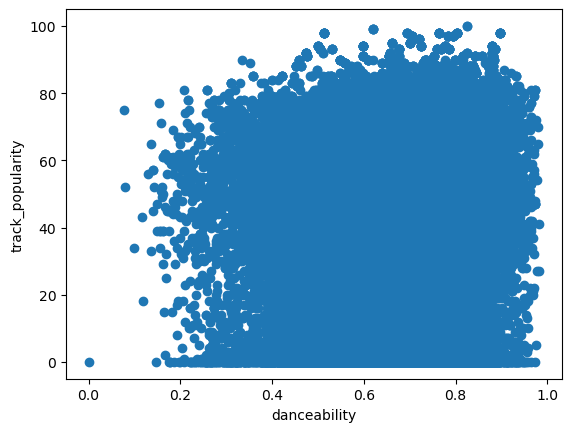

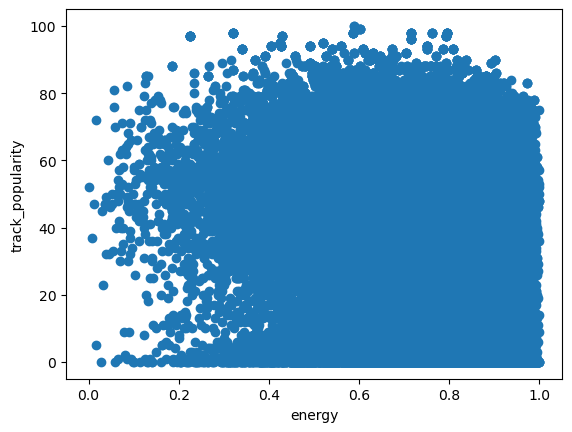

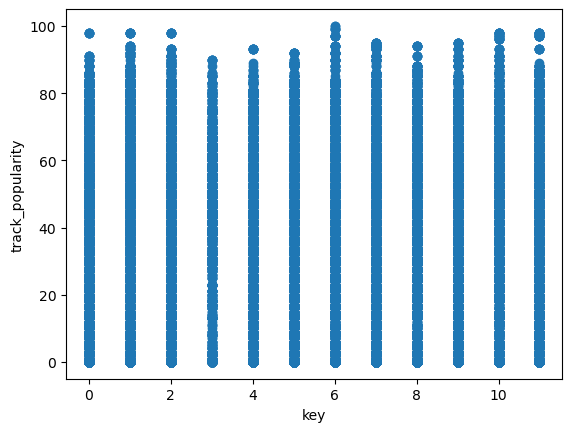

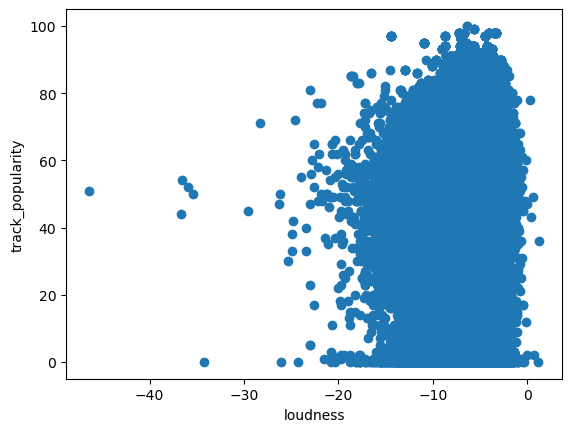

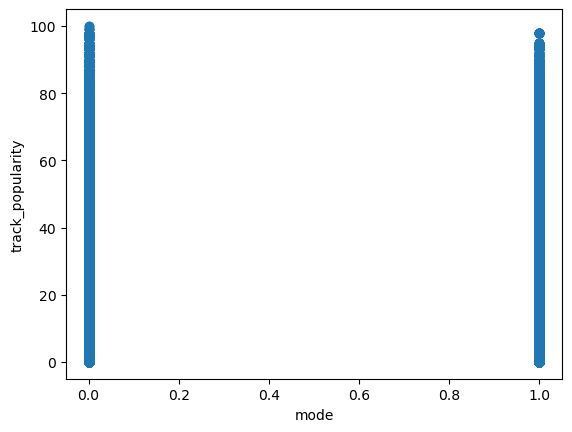

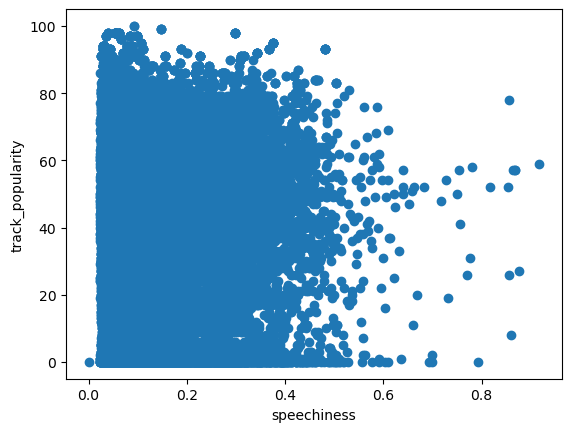

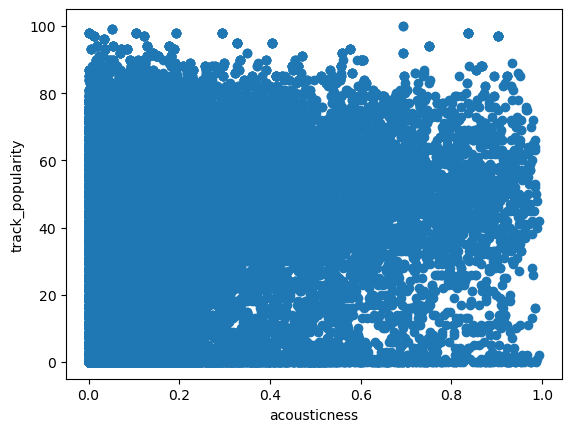

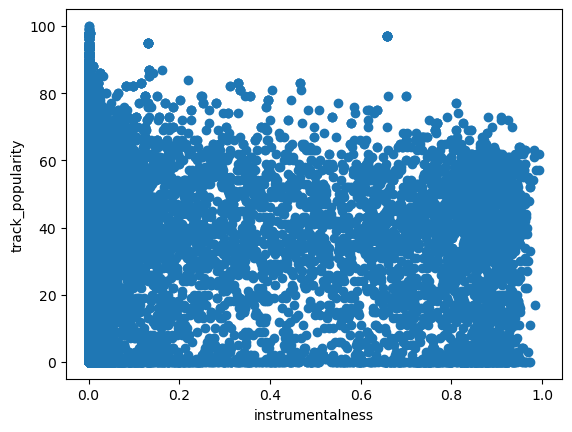

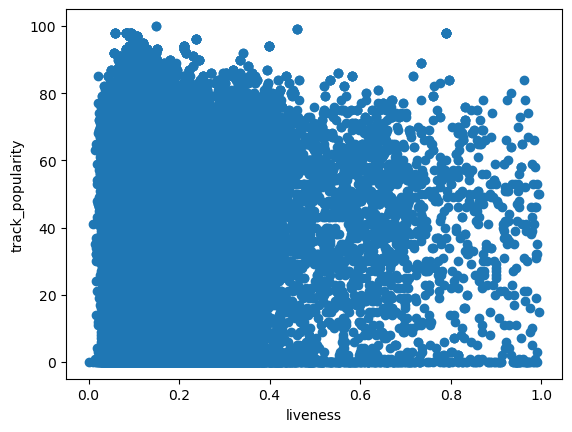

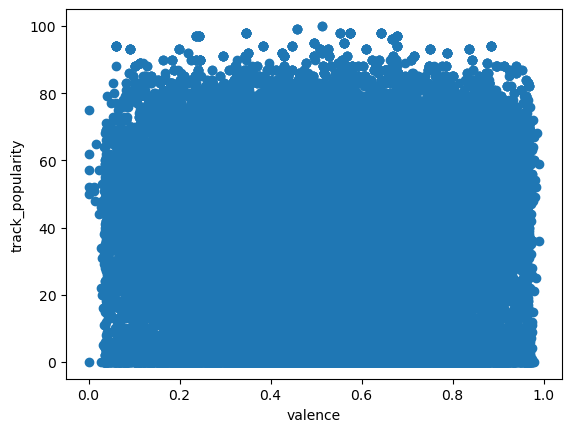

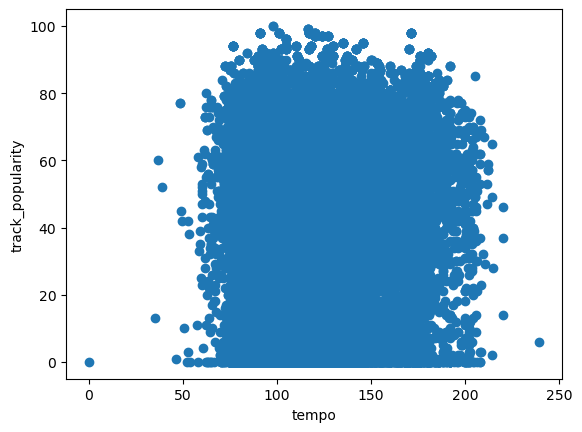

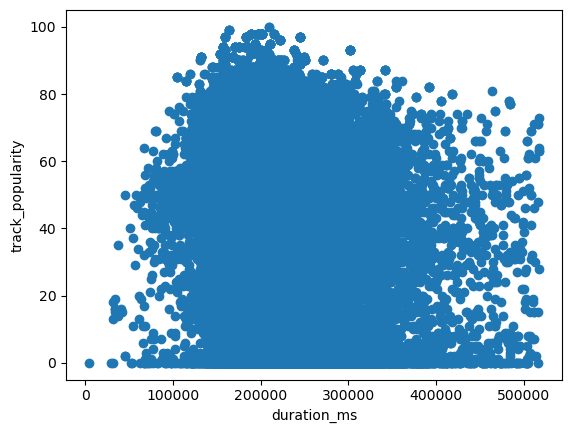

duration_ms         0.351352
tempo               0.343431
loudness            0.320878
acousticness        0.276108
speechiness         0.241379
valence             0.234006
energy              0.230358
danceability        0.215670
liveness            0.210878
instrumentalness    0.193864
key                 0.021458
mode                0.000000
Name: MI Scores, dtype: float64

In [37]:
#Plotting graphs for all the numerical features and target variable
for i in X_num_names:
    plt.scatter(df[i], df['track_popularity'])
    plt.xlabel(i)
    plt.ylabel('track_popularity')
    plt.show()

#Also using mutual information to find out the most important features
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(df[X_num_names], y, discrete_features=False)
mi_scores[::]


In [38]:
X_num_names.remove('mode')
X_num_names.remove('key')
X_num_names

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [10]:
#For establishing a pipeline for imputer and one-hot encoder
from sklearn import compose, pipeline, impute, preprocessing

#Declaring req objects
numerical_imputer = impute.SimpleImputer(strategy='constant')
categorical_imputer = impute.SimpleImputer(strategy='most_frequent')
one_hot_encoder = preprocessing.OneHotEncoder(handle_unknown='ignore', )

categorical_transformer_object = pipeline.Pipeline(steps = [
    ('catimp',categorical_imputer),('onehot',one_hot_encoder)])

#Entire preprocessing unit
preprocessor = compose.ColumnTransformer(transformers=[
    ('num',numerical_imputer, X_num_names),
    ('cat', categorical_transformer_object, X_cat_names)])

In [28]:
from sklearn.model_selection import train_test_split

workingcols = X_cat_names+X_num_names
X = df[workingcols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Evaluating Different Models and Techniques


### Functions for evaluating and visualizing models

In [12]:
#Before evaluating different moedels, we first need to make a function that gives us the mean absolute error
from sklearn import metrics

def get_mae(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_preds = pipeline.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_preds)
    return mae, y_preds

def get_mse(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_preds = pipeline.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_preds)
    return mse

def plotting_stats(y_test, y_preds):
    plt.scatter(y_test, y_preds)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100])

def plotting_rels(y_test, y_preds):
    for i in range(len(X_num_names)):
        plt.scatter(X_test[X_num_names[i]], y_test, color='black', label='Data')
        plt.scatter(X_test[X_num_names[i]], y_preds, color='red', label='Predictions')
        plt.xlabel(X_num_names[i])
        plt.ylabel('track_popularity')
        plt.legend()
        plt.show()

### Linear Regression

The mean absolute error is :  19.456114043161147
The root mean square is :  552.3978199326912


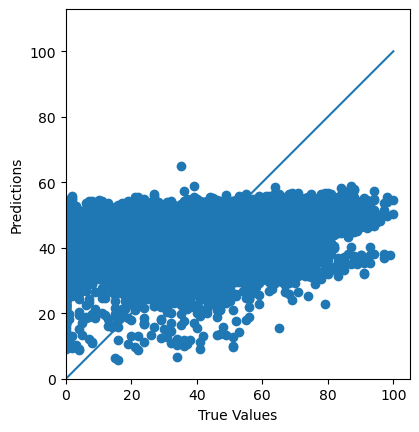

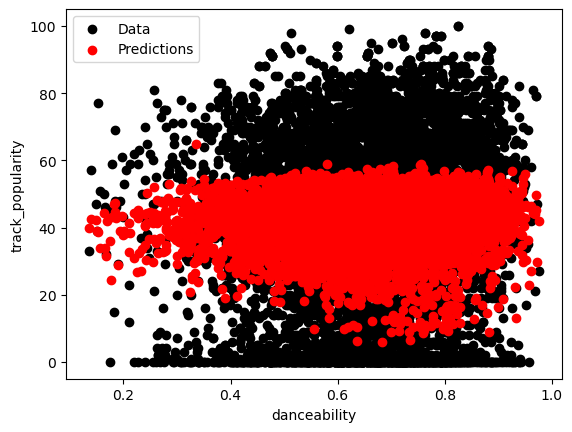

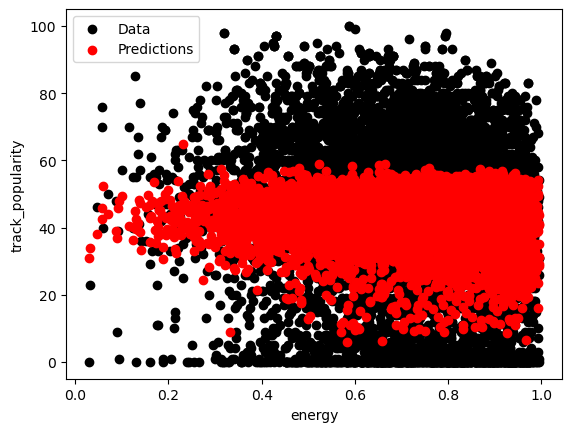

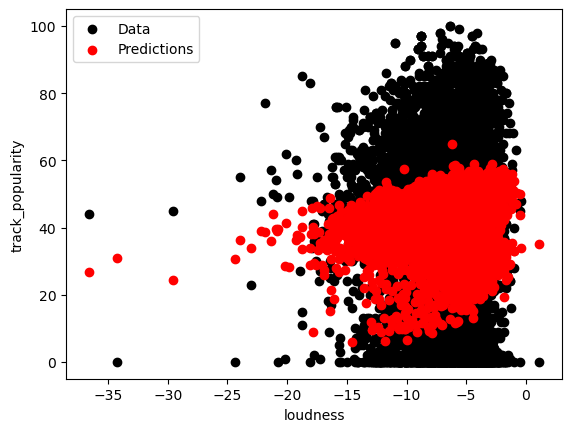

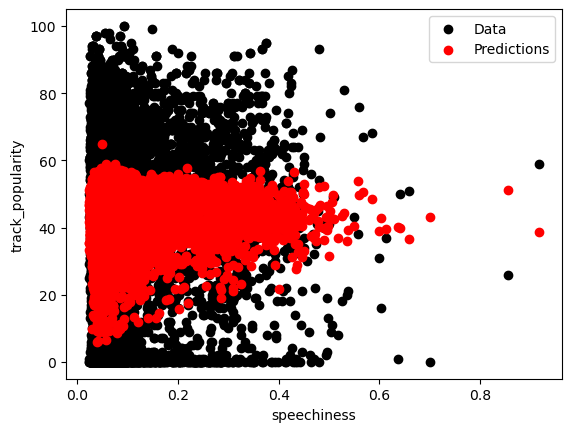

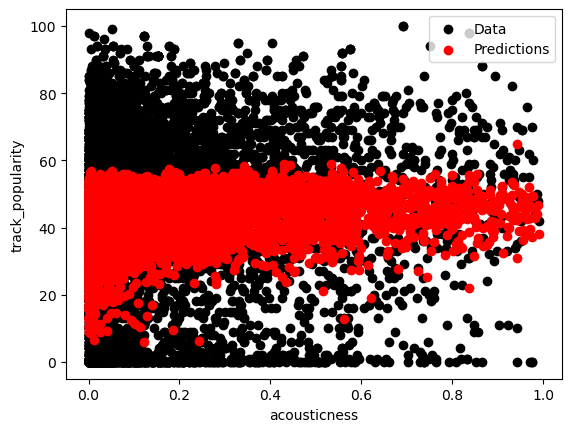

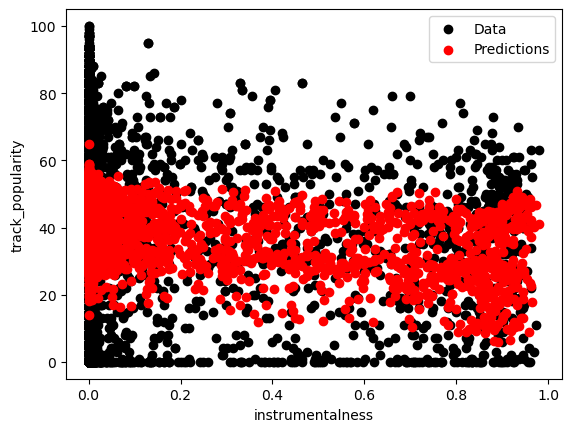

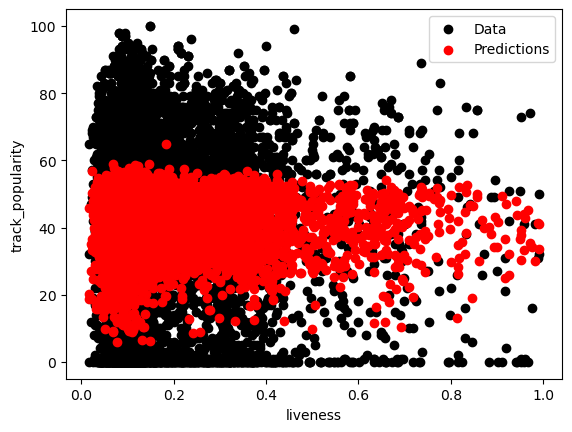

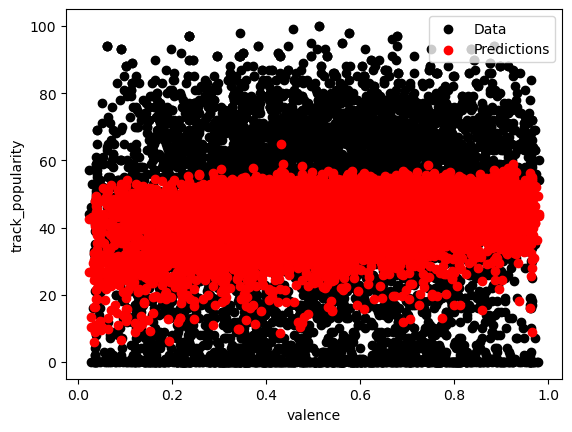

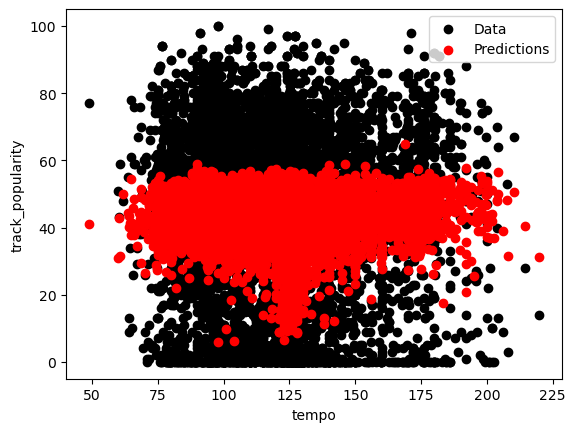

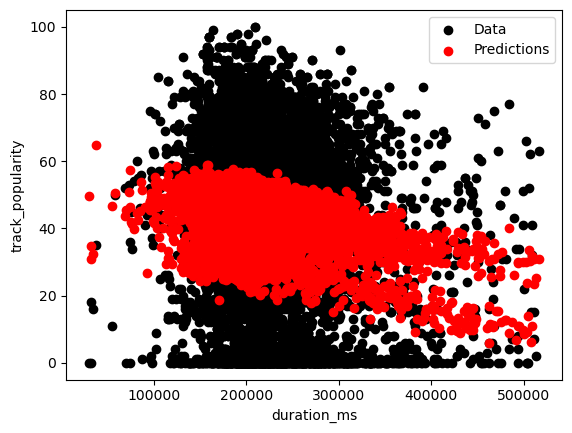

In [13]:
from sklearn.linear_model import LinearRegression

linearR_model = LinearRegression(n_jobs=8)
linearR_pipeline = pipeline.Pipeline(steps=[('preprocess', preprocessor), ('model', linearR_model)])
preprocessor.fit_transform(X_test)

mse, y_preds = get_mae(linearR_pipeline, X_train, y_train, X_test, y_test)
print("The mean absolute error is : ", mse)
print("The root mean square is : ", get_mse(linearR_pipeline, X_train, y_train, X_test, y_test))

plotting_stats(y_test, y_preds)
plt.show()
plotting_rels(y_test, y_preds)

### Descision Tree Regressor

The mean absolute error is :  19.351911070504034
The mean square error is :  552.3978199326912


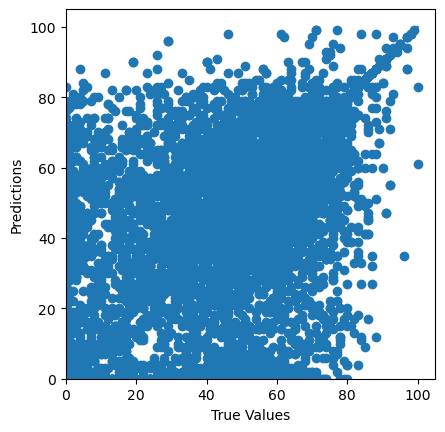

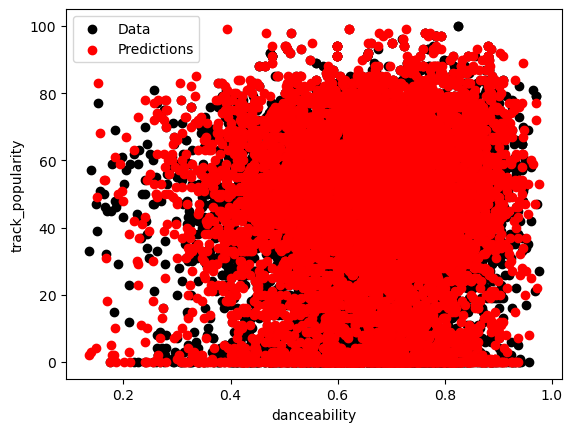

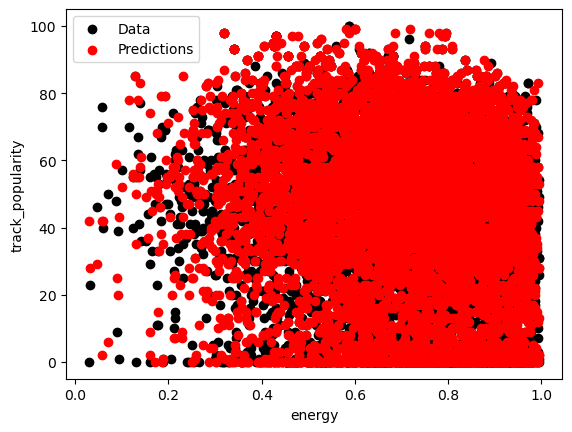

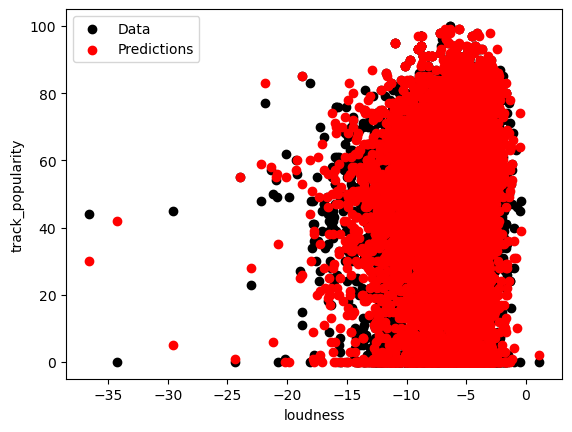

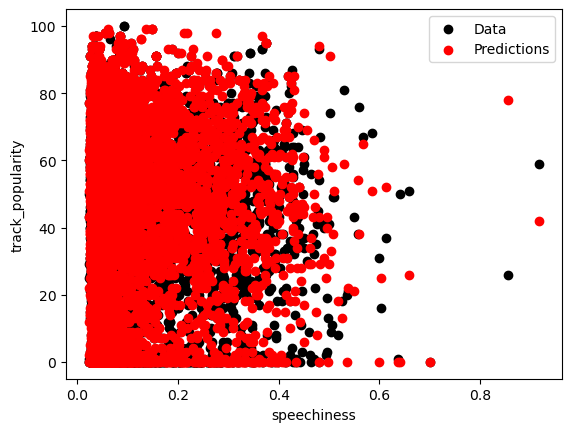

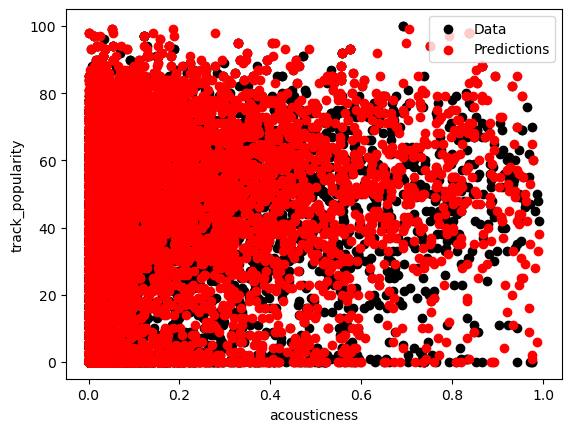

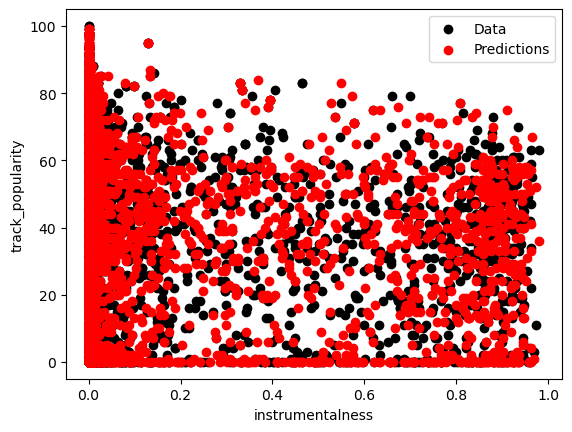

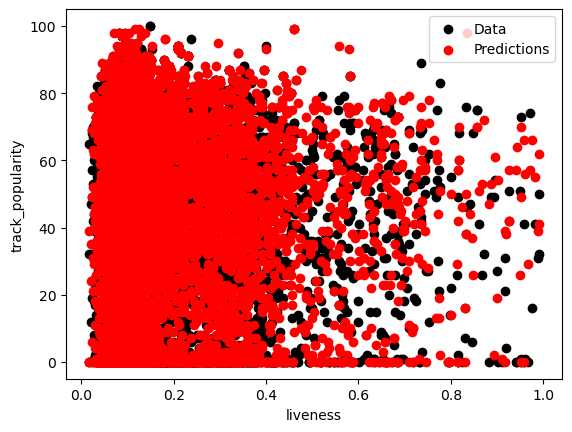

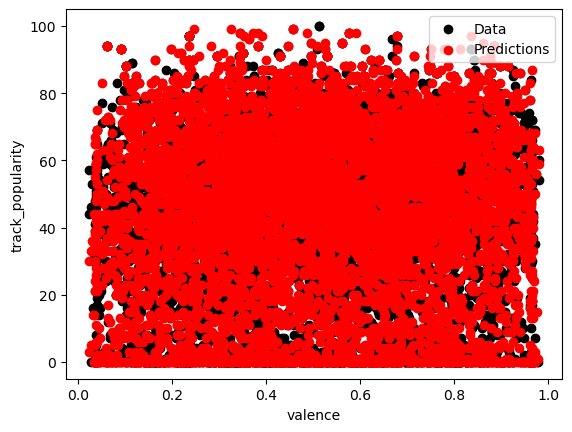

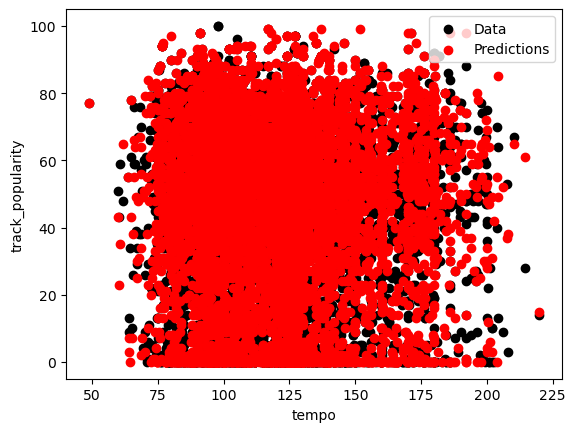

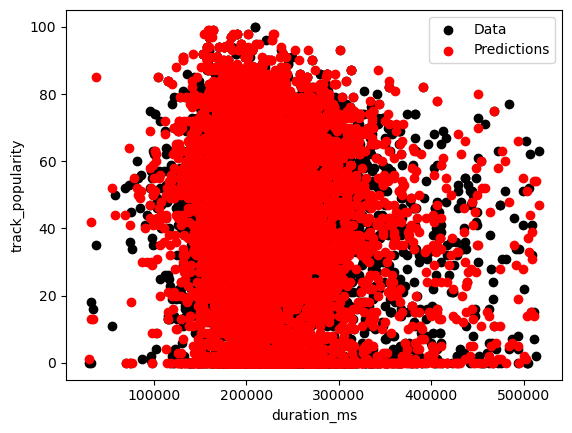

In [14]:
from sklearn.tree import DecisionTreeRegressor

desctree_model = DecisionTreeRegressor(random_state=10)
desc_pipeline = pipeline.Pipeline(steps=[('preprocess', preprocessor), ('model', desctree_model)])

mae, y_preds = get_mae(desc_pipeline, X_train, y_train, X_test, y_test)

print("The mean absolute error is : ", mae)
print("The mean square error is : ", get_mse(linearR_pipeline, X_train, y_train, X_test, y_test))

plotting_stats(y_test, y_preds)
plt.show()
plotting_rels(y_test, y_preds)

### Random Forest Regressor

The mean absolute error is :  15.397675328300956
The mean square error is :  552.3978199326912


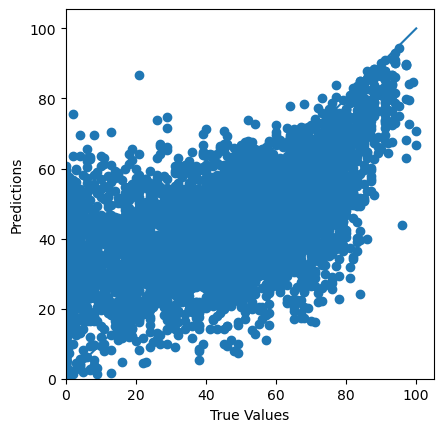

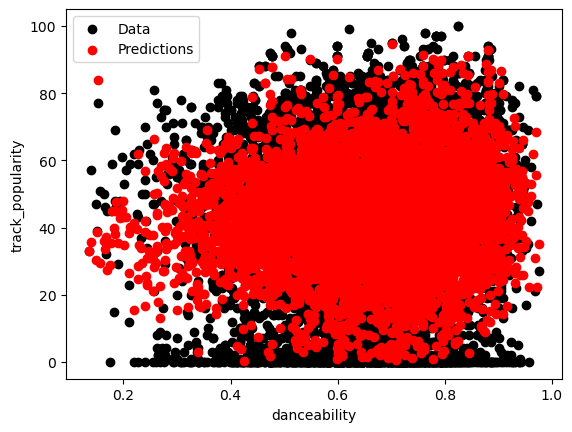

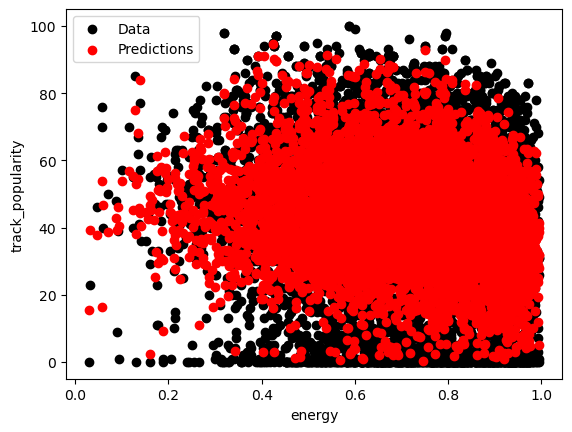

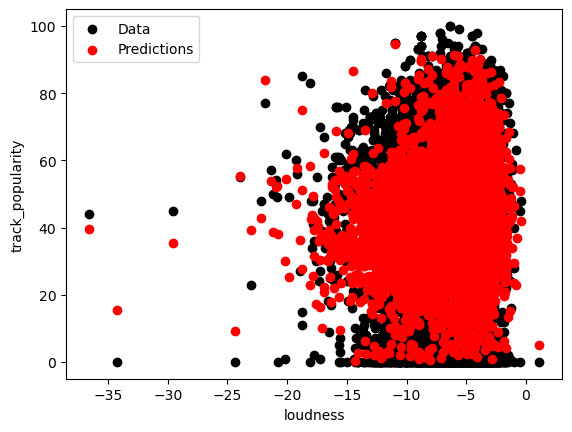

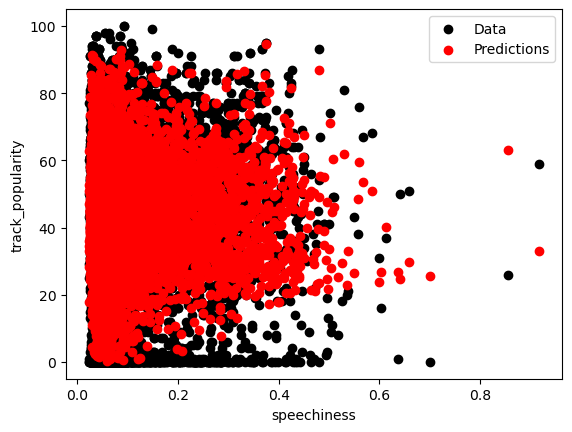

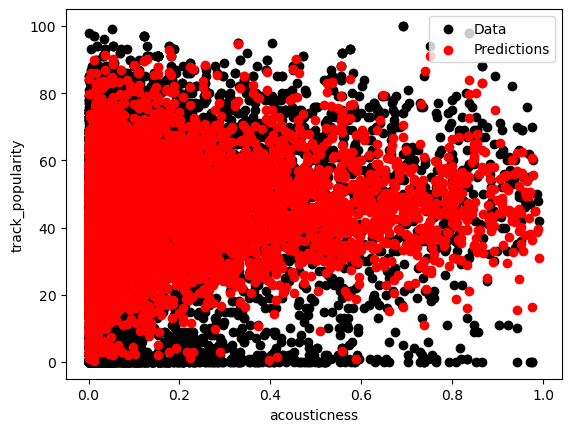

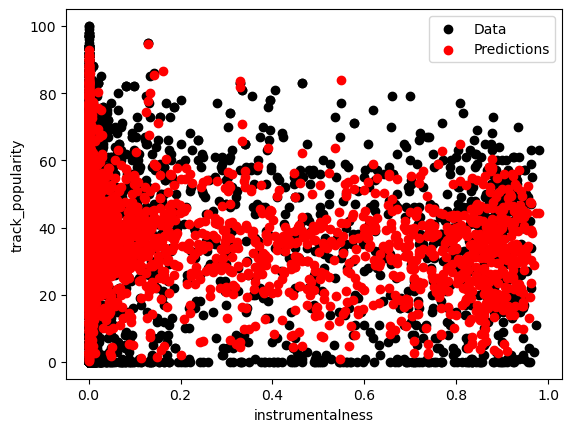

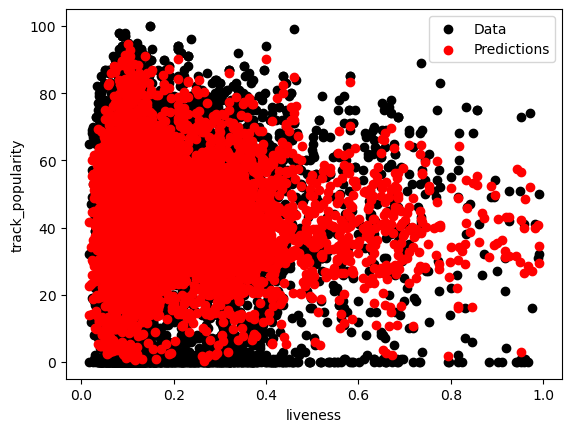

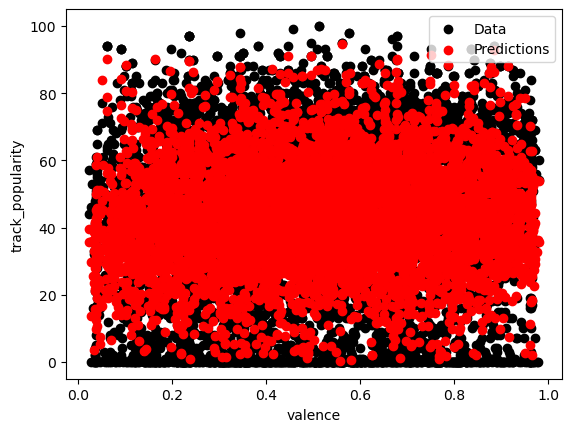

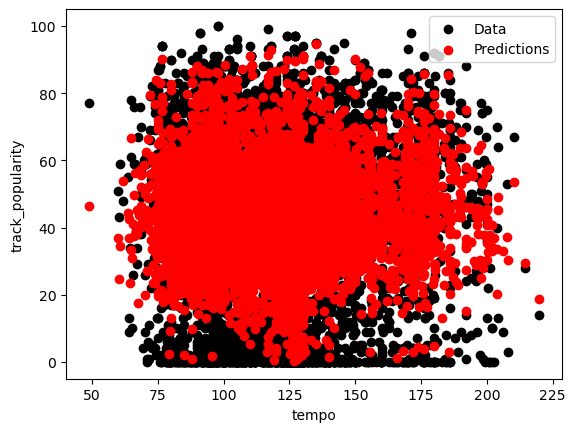

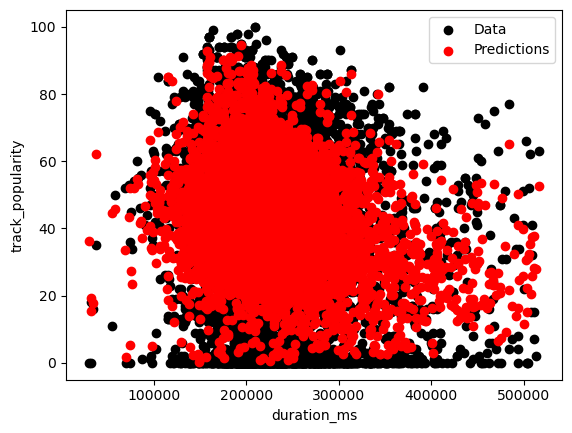

In [15]:
from sklearn.ensemble import RandomForestRegressor

randomtree_model = RandomForestRegressor(n_jobs=8)
randtree_pipeline = pipeline.Pipeline(steps=[('preprocess', preprocessor), ('model', randomtree_model)])

mae, y_preds = get_mae(randtree_pipeline, X_train, y_train, X_test, y_test)

print("The mean absolute error is : ", mae)
print("The mean square error is : ", get_mse(linearR_pipeline, X_train, y_train, X_test, y_test))

plotting_stats(y_test, y_preds)
plt.show()
plotting_rels(y_test, y_preds)

### Gradient Boosting

The mean absolute error is :  15.437002341957765
The mean square error is :  371.48554111907345


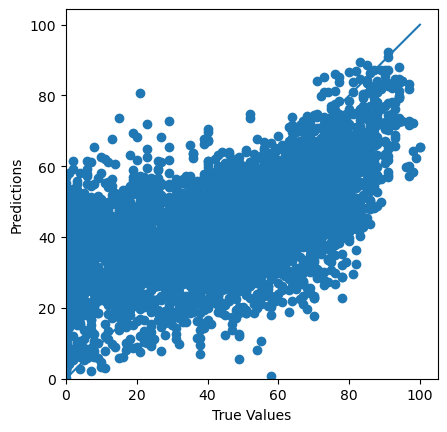

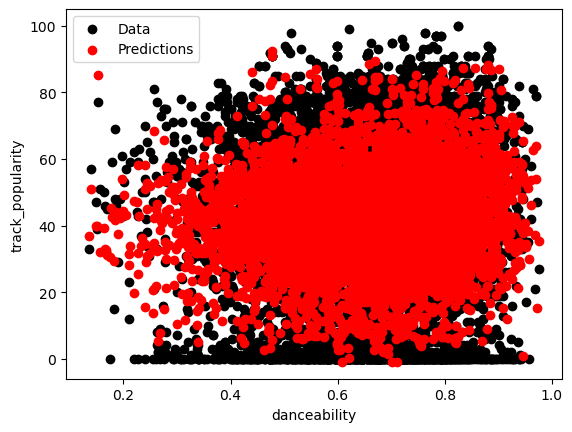

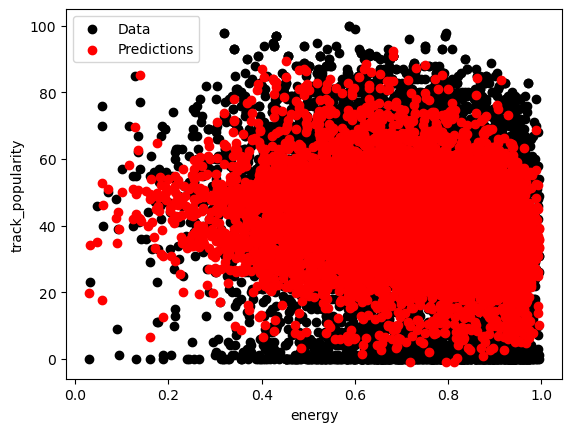

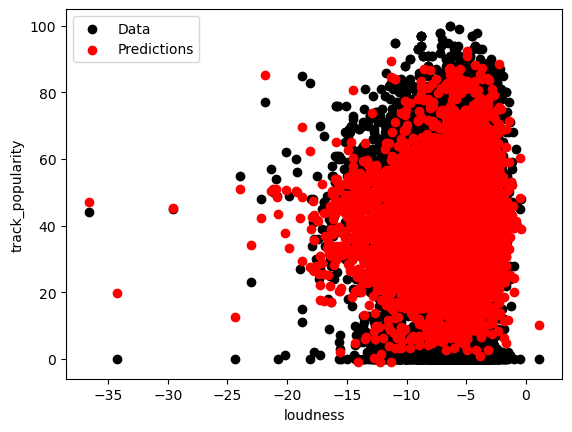

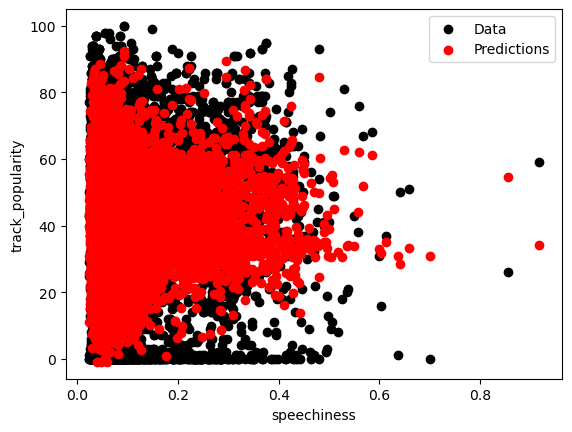

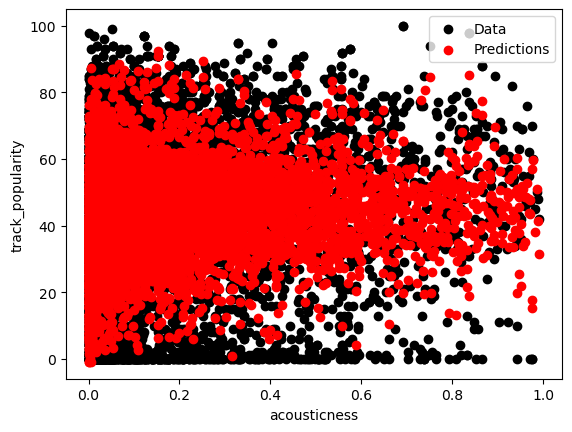

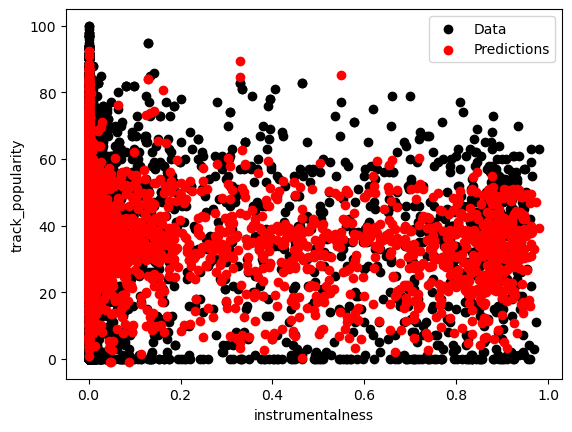

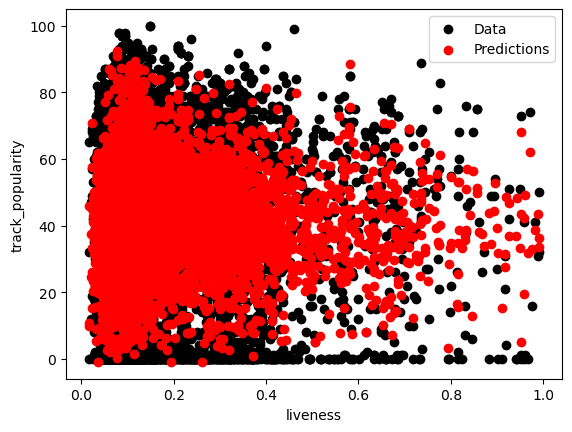

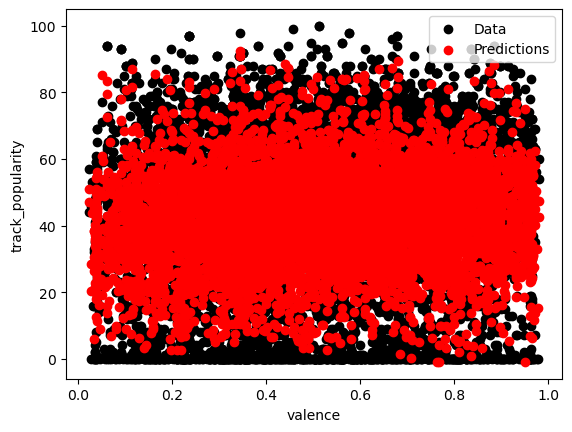

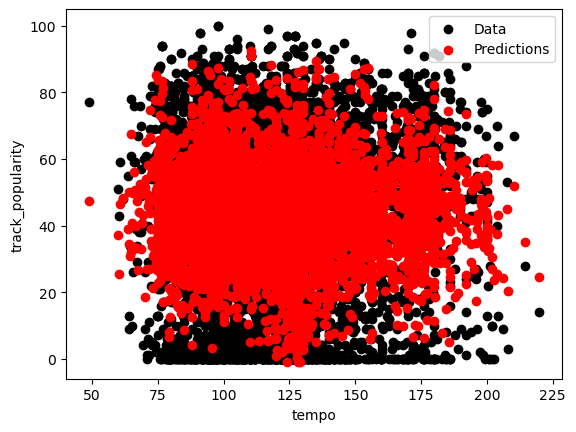

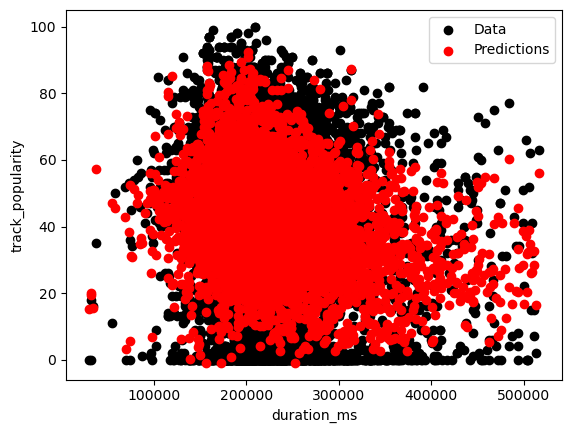

In [16]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_jobs=8, random_state=10, n_estimators=1000, learning_rate=0.05)
xgb_pipeline = pipeline.Pipeline(steps=[('preprocess', preprocessor), ('model', xgb_model)])

preprocessor.transform(X_test)
xgb_pipeline.fit(X_train, y_train)
y_preds = xgb_pipeline.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_preds)
mse = metrics.mean_squared_error(y_test, y_preds)
print("The mean absolute error is : ", mae)
print("The mean square error is : ", mse)

plotting_stats(y_test, y_preds)
plt.show()
plotting_rels(y_test, y_preds)

### Cross-Validation

In [17]:
#Using cross-val to access data
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(xgb_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print("The mean absolute error is : ", scores.mean())
print("The standard deviation is : ", scores.std())

The mean absolute error is :  20.085557864783347
The standard deviation is :  1.1642620329839655
